In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [16]:
# Load mtcars data set
df = pd.read_csv("BreastCancerCoimbra.csv")

df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [17]:
print(10 * "-" + "Info".center(10) + 10 * "-")
df.info()


----------   Info   ----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [18]:
print(10 * "-" + "Missing values (%)".center(10) + 10 * "-")
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

----------Missing values (%)----------


Age               0.0
BMI               0.0
Glucose           0.0
Insulin           0.0
HOMA              0.0
Leptin            0.0
Adiponectin       0.0
Resistin          0.0
MCP.1             0.0
Classification    0.0
dtype: float64

In [19]:
print(10 * "-" + "Description".center(10) + 10 * "-")
df.describe()

----------Description----------


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [20]:
train_data, test_data = train_test_split(df, test_size=0.1,random_state=20)

print('The size of training data is: {} \nThe size of testing data is: {}'.format(len(train_data), len(test_data)))

The size of training data is: 104 
The size of testing data is: 12


<AxesSubplot:xlabel='Classification', ylabel='count'>

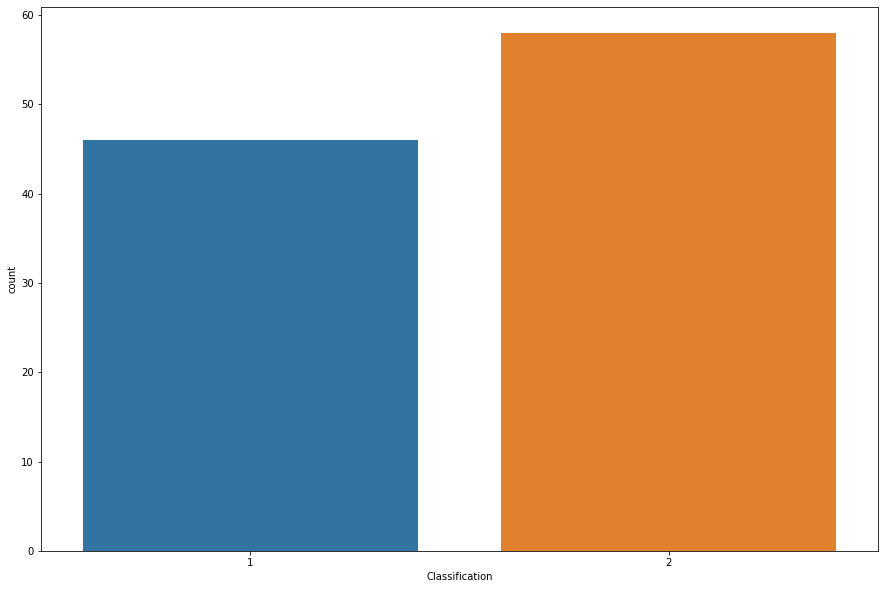

In [21]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='Classification')

In [22]:
from sklearn.preprocessing import OrdinalEncoder

from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('ord_enc', OrdinalEncoder())
    
])

df_prepared = pipe.fit_transform(df)

In [23]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()

tree_clf.fit(df_prepared, df_prepared)

DecisionTreeClassifier()

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(50,45))
plot_tree(tree_clf, feature_names=df.columns, class_names=['1','2'])
plt.savefig('out.pdf')